In [16]:
# import os
import pickle
import random

import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd

from tactile_encoding.utils.utils import value2key

from sklearn.preprocessing import minmax_scale



In [17]:
temp_jitter = True
if temp_jitter:
    filename_data = "./data/data_encoding_noisy_temp_jitter.pkl"
else:
    filename_data = "./data/data_encoding_noisy.pkl"
# infile = open("/space/fra/telluride2022/nte_encoding/tactile_encoding/data_encoding_original", 'rb')
infile = open(filename_data, 'rb')
encoded_data_noisy = pickle.load(infile)
infile.close()

In [18]:
classes_list = {
        'A': "Tonic spiking",
        'B': "Class 1",
        'C': "Spike frequency adaptation",
        'D': "Phasic spiking",
        'E': "Accommodation",
        'F': "Threshold variability",
        'G': "Rebound spike",
        'H': "Class 2",
        'I': "Integrator",
        'J': "Input bistability",
        'K': "Hyperpolarizing spiking",
        'L': "Hyperpolarizing bursting",
        'M': "Tonic bursting",
        'N': "Phasic bursting",
        'O': "Rebound burst",
        'P': "Mixed mode",
        'Q': "Afterpotentials",
        'R': "Basal bistability",
        'S': "Preferred frequency",
        'T': "Spike latency",
    }

### Create subplots

IndexError: index 165 is out of bounds for axis 0 with size 40

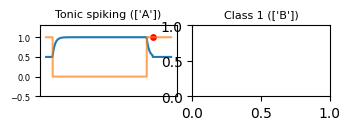

In [19]:
max_trials = 100
# fig, axs = plt.subplots(5, 4)
for num, el in enumerate(list(classes_list.values())):
    # select a sample trial out of max_trials
    pos = range(num*max_trials, num*max_trials+max_trials)
    pos = np.random.choice(pos)

    plt.subplot(5, 4, num+1)
    plt.title("{} ({})".format(el, value2key(el, classes_list)), fontsize=8)

    # raster plot
    spikes = np.reshape(np.array(encoded_data_noisy[pos][0]), (np.array(
        encoded_data_noisy[pos][0]).shape[0]))
    plt.scatter(np.where(spikes == 1)[
                0]+1, spikes[np.where(spikes == 1)], s=15, color='red')  # only plot spikes

    # voltage trace
    voltage = np.reshape(np.array(encoded_data_noisy[pos][1]), (np.array(
        encoded_data_noisy[pos][1]).shape[0]))
    plt.plot(range(1, len(voltage)+1), voltage/min(voltage))

    # input current trace
    input_current = np.reshape(np.array(encoded_data_noisy[pos][2]), (np.array(
        encoded_data_noisy[pos][2]).shape[0]))

    input_current = minmax_scale(input_current, feature_range=(0, 1), axis=0, copy=True)
    plt.plot(range(1, len(input_current)+1), input_current, alpha=0.7)

    plt.ylim((-0.5, 1.3))
    # only plot on most outer subplot
    if num == 0 or num == 4 or num == 8 or num == 12:
        plt.xticks([], [])
        plt.tick_params(axis='y', labelsize=6)
    elif num == 16:
        plt.tick_params(axis='x', labelsize=6)
        plt.tick_params(axis='y', labelsize=6)
    elif num > 16:
        plt.tick_params(axis='x', labelsize=6)
        plt.yticks([], [])
    else:
        plt.xticks([], [])
        plt.yticks([], [])

    plt.tight_layout()
plt.show()


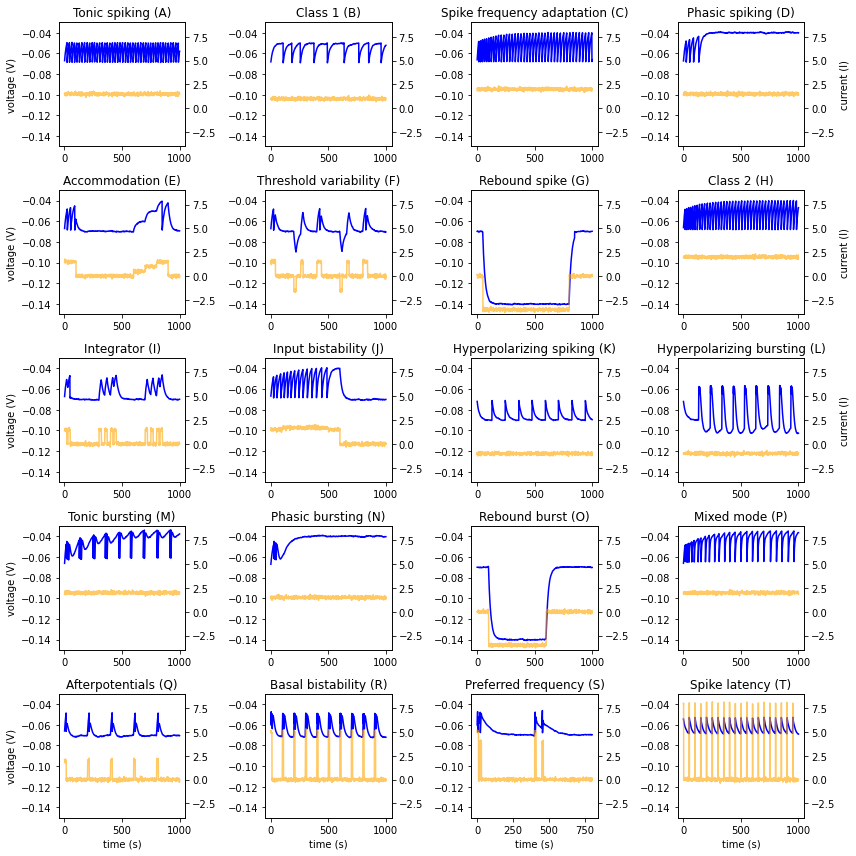

In [ ]:
def two_scales(ax1, time, data1, data2, c1, c2, create_xlabel = False, create_ylabel1 = False, create_ylabel2 = False):
    ax2 = ax1.twinx()
    # plot data
    ax1.plot(time, data1, color=c1)
    ax2.plot(time, data2, color=c2, alpha=0.6)
    # set limits
    ax1.set_ylim(-0.15, -0.03)
    ax2.set_ylim(-4, 9)
    # create labels if needed
    if create_xlabel:
        ax1.set_xlabel('time (s)')
    if create_ylabel1:
        ax1.set_ylabel('voltage (V)')
    if create_ylabel2:
        ax2.set_ylabel('current (I)')

    return ax1, ax2

plt.figure(figsize=(12,12))
max_trials = 100
# fig, axs = plt.subplots(5, 4)
for num, el in enumerate(list(classes_list.values())):
    # select a sample trial out of max_trials
    pos = range(num*max_trials, num*max_trials+max_trials)
    pos = np.random.choice(pos)
    ax = plt.subplot(5, 4, num+1)
    plt.title("{} ({})".format(el, value2key(el, classes_list))) #, fontsize=8

    # voltage trace
    voltage = np.reshape(np.array(encoded_data_noisy[pos][1]), (np.array(
        encoded_data_noisy[pos][1]).shape[0]))    

    # input current trace
    input_current = np.reshape(np.array(encoded_data_noisy[pos][2]), (np.array(
        encoded_data_noisy[pos][2]).shape[0]))

    # only add labels on most outer subplot
    if num == 0 or num == 4 or num == 8 or num == 12:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, 'b', 'orange', create_xlabel=False, create_ylabel1=True, create_ylabel2=False)
    elif num == 3 or num == 7 or num == 11:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, 'b', 'orange', create_xlabel=False, create_ylabel1=False, create_ylabel2=True)
    elif num == 16:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, 'b', 'orange', create_xlabel=True, create_ylabel1=True, create_ylabel2=False)
    elif num > 16 and num < 20:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, 'b', 'orange', create_xlabel=True, create_ylabel1=False, create_ylabel2=False)
    elif num == 20:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, 'b', 'orange', create_xlabel=True, create_ylabel1=False, create_ylabel2=True)
    else:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, 'b', 'orange', create_xlabel=False, create_ylabel1=False, create_ylabel2=False)

    plt.tight_layout()
plt.show()




### Create single plots

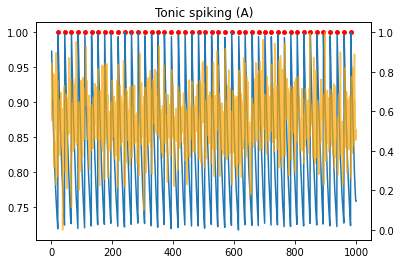

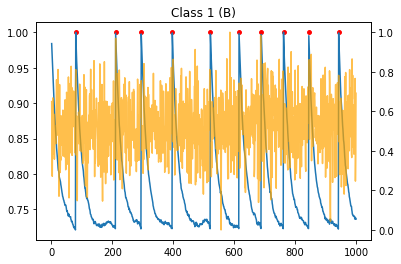

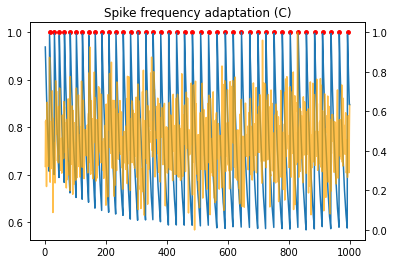

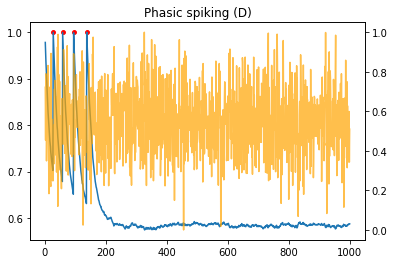

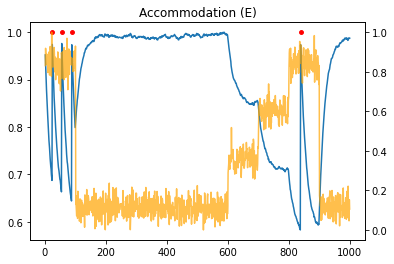

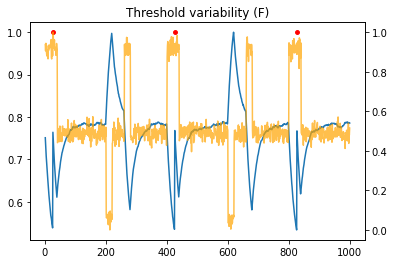

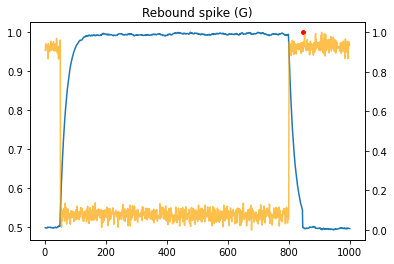

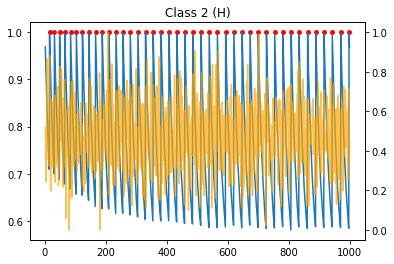

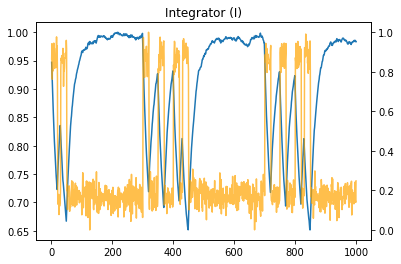

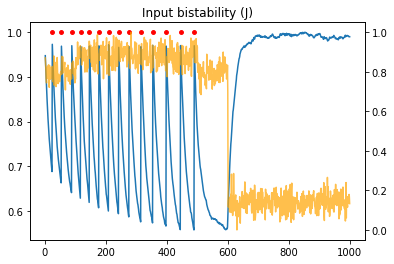

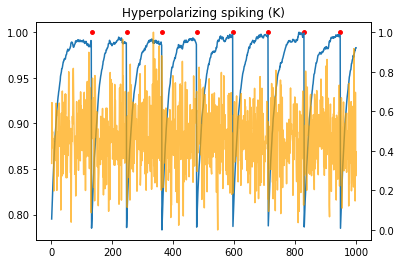

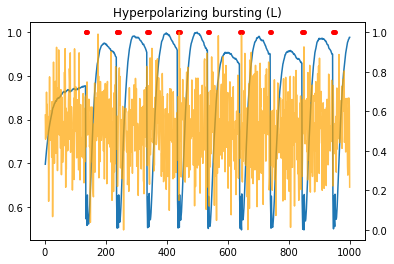

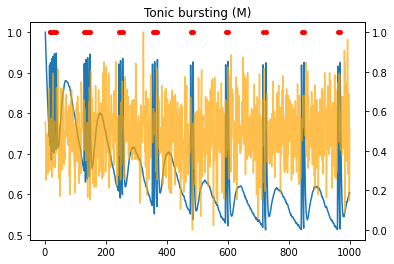

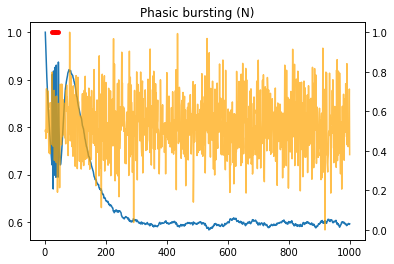

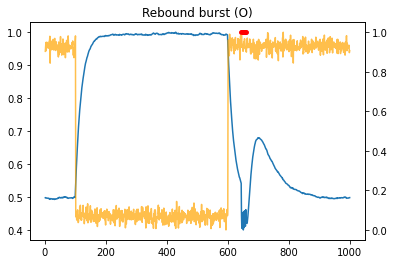

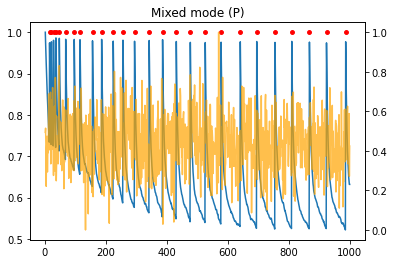

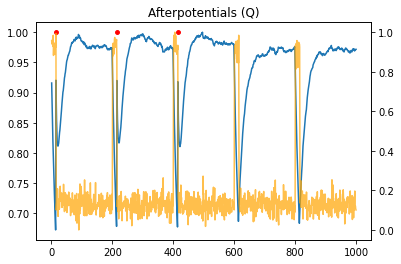

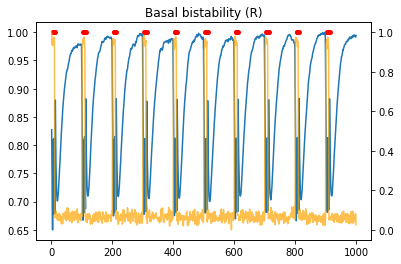

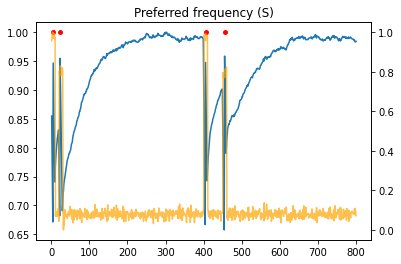

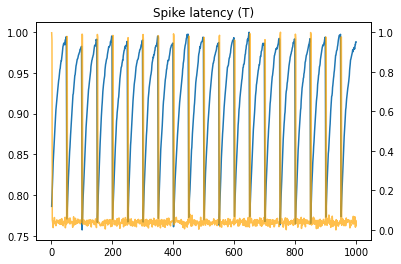

In [ ]:
max_trials = 100
for num, el in enumerate(list(classes_list.values())):
    # select a sample trial out of max_trials
    pos = range(num*max_trials, num*max_trials+max_trials)
    pos = np.random.choice(pos)
    
    fig, ax = plt.subplots()

    plt.title("{} ({})".format(el, value2key(el, classes_list)))
    
    # raster plot
    spikes = np.reshape(np.array(encoded_data_noisy[pos][0]), (np.array(
        encoded_data_noisy[pos][0]).shape[0]))
    ax = plt.scatter(np.where(spikes == 1)[
                0]+1, spikes[np.where(spikes == 1)], s=15, color='red')  # only plot spikes

    # voltage trace
    voltage = np.reshape(np.array(encoded_data_noisy[pos][1]), (np.array(
        encoded_data_noisy[pos][1]).shape[0]))
    ax = plt.plot(range(1, len(voltage)+1), voltage/min(voltage))

    ax2 = plt.twinx()
    # input current trace
    input_current = np.reshape(np.array(encoded_data_noisy[pos][2]), (np.array(
        encoded_data_noisy[pos][2]).shape[0]))
    input_current = minmax_scale(input_current, feature_range=(0, 1), axis=0, copy=True)
    ax2 = plt.plot(range(1, len(input_current)+1), input_current, color='orange', alpha=0.7)

    plt.show()


<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.